# SC1015 Mini Project - Team 7
#### Members: 
> Janelle Koh Wei Shan  
> Chew Zhi Yi Mark  
> Teoh Xi Sheng  

#### Dataset: Diabetes Health Indicators Dataset

## 1. Data Collection
---

### 1.1 Importing essential libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import matplotlib.gridspec as gridspec

In [2]:
rawData = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
rawData.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### 1.3 Data dictionary 

Description of the dataset, as available on Kaggle, is as follows:  
Data Dictionary   : https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf  
Dataset   : https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset-notebook

> **Diabetes_binary (Cat)** : Surveyee was ever told by doctor to have diabetes  
> **HighBP (Cat)** : Surveyee was ever told by doctor to have high blood pressure  
> **HighChol (Cat)** : Surveyee was ever told by doctor to have high blood cholesterol  
> **CholCheck (Cat)** : Surveyee has done a cholesterol check in the past 5 years  
> **BMI (Num)** : Surveyee's Body Mass Index (BMI)  
> **Smoker (Cat)** : Surveyee is a smoker or non-smoker  
> **Stroke (Cat)** : Surveyee has ever had a stroke  
> **HeartDiseaseorAttack (Cat)** : Surveyee has ever had a heart disease or heart attack  
> **PhysActivity (Cat)** : Surveyee has participated in any physical activities in the past month  
> **Fruits (Cat)** : Surveyee has at least one fruit intake per day  
> **Veggies (Cat)** : Surveyee has at least one vegetable intake per day  
> **HvyAlcoholConsump (Cat)** : Surveyee is a heavy drinker  
> **AnyHealthcare (Cat)** : Surveyee has healthcare coverage  
> **NoDocbcCost (Cat)** : Surveyee could not see a doctor in the past 12 months due to cost  
> **GenHlth (Cat, Non-binary)** : Surveyee's personal rating on his general health   
> **MentHlth (Cat, Non-binary)** : Number of days that surveyee has poor mental health (depression/stress) in the past 30 days  
> **PhysHlth (Cat, Non-binary)** : Number of days that surveyee has poor physical health (illness/injuries) in the past 30 days  
> **DiffWalk (Cat)** :  Surveyee has difficulty walking or climbing stairs  
> **Sex (Cat)** :  Surveyee is a male or female  
> **Age (Cat, Non-binary)** :  Surveyee's age range <br>
> **Education (Cat, Non-binary)** :  Surveyee's educational level  
> **Income (Cat, Non-binary)** :  Surveyee's income category  

### 1.4 Dataframe information

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

Let's list down all our observations from the super-quick glance of the dataset, as above.
* There are `22` variables/columns and `70692` samples/rows in the dataset.    
* The response variable seems to be `Diabetes_binary`, while the remaining `21` are most likely predictors.   
* All `22` variables are identified as `float64` by default, but they are a mix of **21 Categorical Variables** and **1 Numerical Variable**.
* After inspection, none of the variables/features seem to have any missing value.

### 1.5 Problem Definition

Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Having diabetes also increases the risk of many complications such as cardiovascular disease and kidney damage. Detecting diabetes early can help pave the way for effective treatment, highlighting the importance of knowing what factors are strongly associated with diabetes. Hence, predictive models for diabetes risk are important tools for the public and public health officials. This leads us to our problem question: 

### <center> "What are the most important factors in predicting whether a person has diabetes?" </center>

---
## 2. Data Cleaning and Preparation

### 2.1 Renaming Binary Data

Changing categorical data with `1.0 and 0.0` to `Yes and No` respectively  

In [4]:
# List of categorical variables with binary response
cat = ['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk',
       'Sex']

# List of categorical variables to be modified
cat_mod = ['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

# Shuffling of dataset
rawData = rawData.sample(frac = 1, random_state=123)

# Renaming response variable name

# rawDF_Bin: 1.0 / 0.0
rawDF_Bin = rawData.rename(columns={'Diabetes_binary': 'Diabetes'})
# rawDF_YN: Yes / No
rawDF_YN = rawData.rename(columns={'Diabetes_binary': 'Diabetes'})

# Replacing float to object for rawDF
for i in cat_mod:
    rawDF_YN[i] = rawDF_Bin[i].map({1.0: 'Yes', 0.0: 'No'})

# Replacing float to object for variable sex
rawDF_YN['Sex'] = rawDF_YN['Sex'].map({1.0: 'M', 0.0: 'F'})

In [5]:
rawDF_YN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70692 entries, 17107 to 15725
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes              70692 non-null  object 
 1   HighBP                70692 non-null  object 
 2   HighChol              70692 non-null  object 
 3   CholCheck             70692 non-null  object 
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  object 
 6   Stroke                70692 non-null  object 
 7   HeartDiseaseorAttack  70692 non-null  object 
 8   PhysActivity          70692 non-null  object 
 9   Fruits                70692 non-null  object 
 10  Veggies               70692 non-null  object 
 11  HvyAlcoholConsump     70692 non-null  object 
 12  AnyHealthcare         70692 non-null  object 
 13  NoDocbcCost           70692 non-null  object 
 14  GenHlth               70692 non-null  float64
 15  MentHlth       

### 2.2 Normalising The Dataset
Samples do not need to be normalised as the given data has been normalised to `50:50` for the response variable `Diabetes_binary`

### 2.3 Removing Outliers
To be continued after exploration of dataset

### 2.4 Splitting Data into Training and Test Sets
Dataset will be split into 80% for training set and 20% for test set

In [6]:
#Shuffling of dataset was done earlier above
# Train Set : 80% samples
# Test Set : 20% samples

# Binary set (1.0, 0.0)
train, test = np.split(rawDF_Bin, [int(0.8*len(rawDF_Bin))])

# Object set (Yes, No)
train_YN, test_YN = np.split(rawDF_YN, [int(0.8*len(rawDF_YN))])


# Check the sample sizes
print("Total Set :", rawDF_Bin.shape)
print("Train Set 80% :", train.shape)
print("Test Set  20% :", test.shape)

Total Set : (70692, 22)
Train Set 80% : (56553, 22)
Test Set  20% : (14139, 22)


---
## 3. Exploratory Data Analysis (Train Dataset)

### 3.1 Distribution of Response Variable `Diabetes`

Plotting the distribution of `Diabetes`

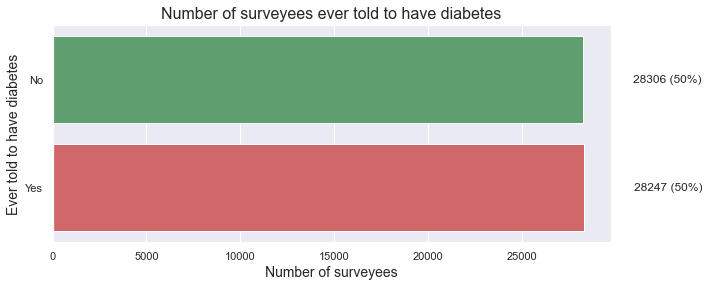

In [7]:
# Function for displaying data labels
def datalabel(col):
    abs_values = train_YN[col].value_counts(ascending=False)
    rel_values = train_YN[col].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container=ax.containers[0], labels=lbls, padding = 50)

# Define Palette
p = ['#55a868',"#e15759"]
# Plotting distribution of response variables 'Diabetes_binary'
f = plt.figure(figsize=(10, 4))
ax = sb.countplot(y = 'Diabetes', data = train_YN, palette = p)
datalabel('Diabetes')
plt.title('Number of surveyees ever told to have diabetes', fontsize = 16)
plt.ylabel('Ever told to have diabetes', fontsize = 14)
plt.xlabel('Number of surveyees', fontsize = 14)
plt.show()

### 3.2 Explore whether each variable has any relation with `Diabetes`
### 3.2.1 Categorical Data with Binary Response (Yes, No)




In [8]:
# Splitting categorical var into different categories
disease_cat = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']
consump_cat = ['Fruits', 'Veggies', 'HvyAlcoholConsump']
behav_cat = ['PhysActivity', 'Smoker', 'DiffWalk']
sex_cat = ['Sex']
hcare_cat = ['CholCheck', 'AnyHealthcare', 'NoDocbcCost']


# Function for plotting multiple countplots
def multiCountPlot(cat, r, c):
    count = 0
    order = ['No', 'Yes']
    
    f, axes = plt.subplots(r, c, figsize=(16, 36))
    for i in range(r):
        sb.countplot(x = cat[count], data = train_YN, order = order , ax = axes[i][0])
        sb.countplot(x = cat[count], hue = 'Diabetes', data = train_YN, order = order , palette = p, ax = axes[i][1])
        count += 1
        
        if cat[count] == 'Sex':
            order = ['M', 'F']
            
        sb.countplot(x = cat[count], data = train_YN, order = order , ax = axes[i][2])
        sb.countplot(x = cat[count], hue = 'Diabetes', data = train_YN, order = order , palette = p, ax = axes[i][3])
        count += 1
        
        if (len(cat) == count): return

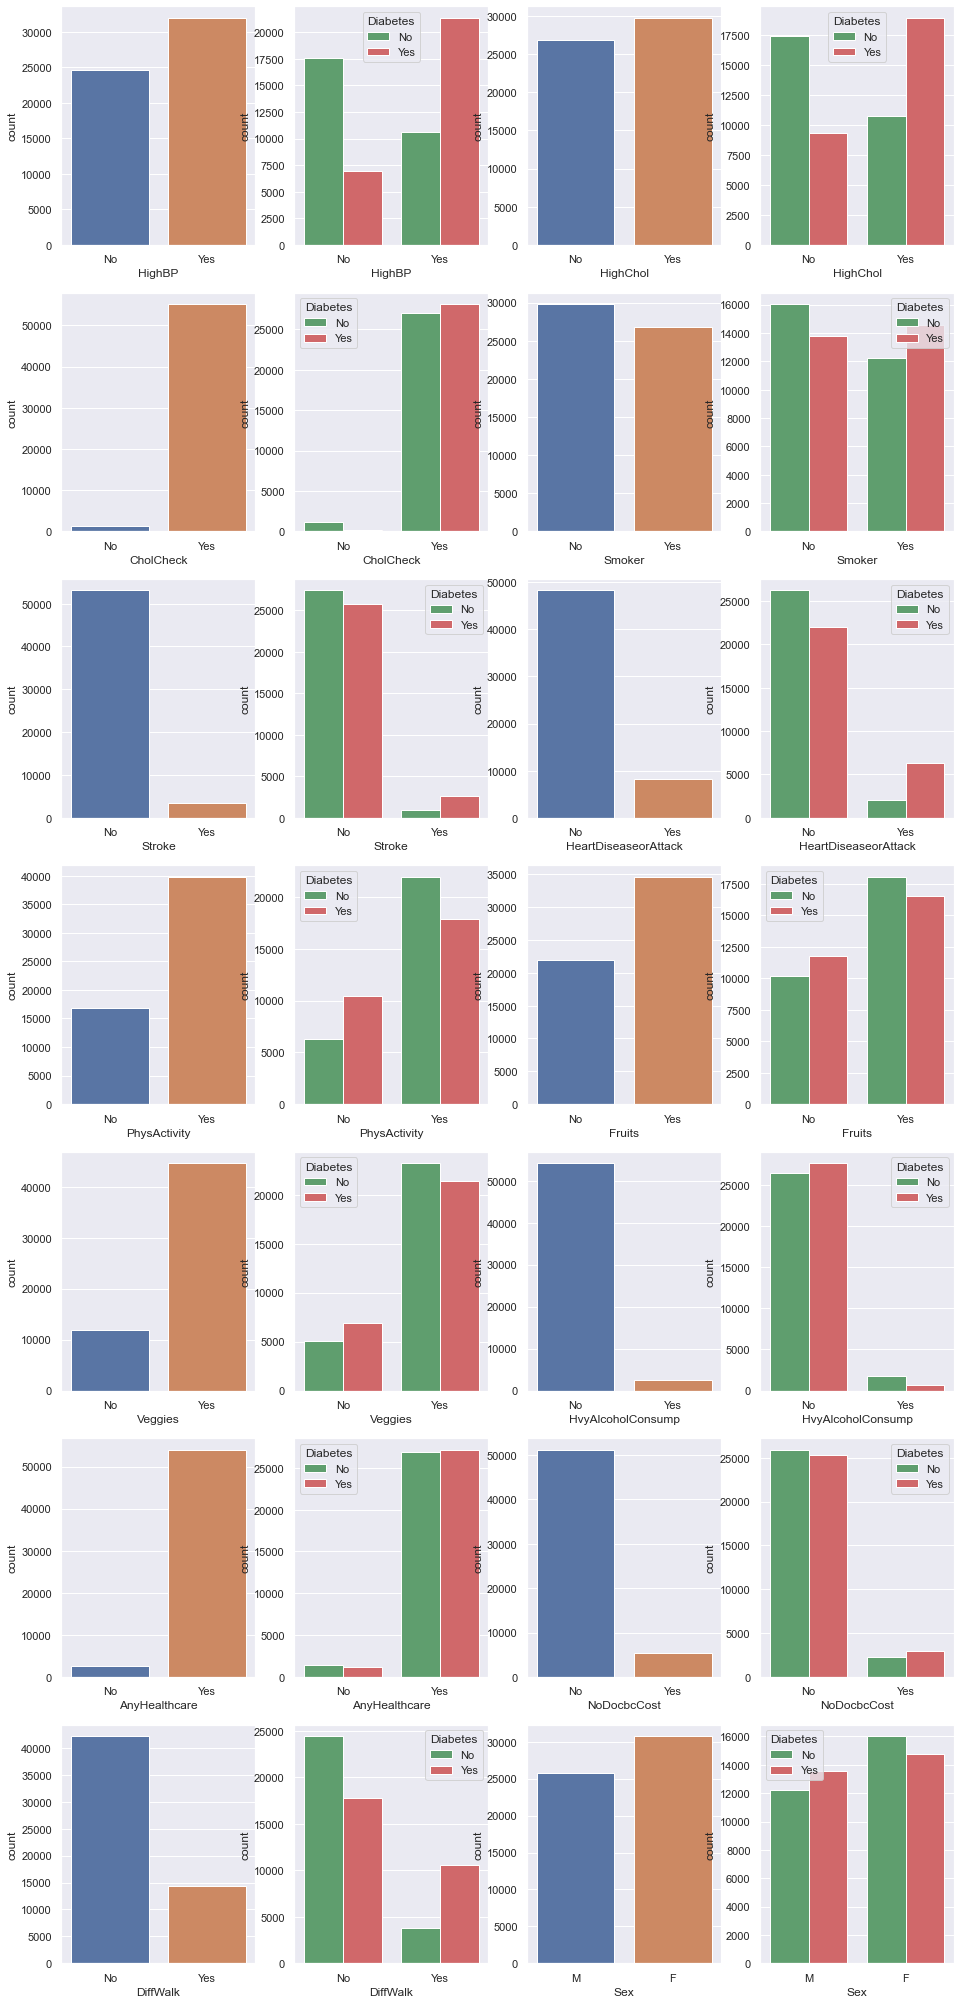

In [9]:
multiCountPlot(cat[1::], 7, 4)
#Blue and Orange is for the general makeup for the factors, red and green when in relation to diabetes

plt.show()

### Analysis

- We can observe that variables such as `HighBP`, `HighChol` have a strong positive relationship with `Diabetes` where there are **more surveyees diagnosed with Diabetes** if they have a **High Blood Pressure** or **High Cholesterol**.  

- Variables `HeartDiseaseorAttack` and `DiffWalk` also have a weak positive relationship with `Diabetes` where there is **a higher proportion of surveyees diagnosed with Diabetes** if they **have had a heart disease or heart attack** or **have difficulty walking or climbing stairs**.

- Similarly, we can observe that `PhysActivity` has a weak negative correlation with `Diabetes` where there are **more surveyees diagnosed with Diabetes** if they **did not participate in any physical activities in the past month**.

- We also can observe that variables such as `AnyHealthcare` do not seem to have any correlation with `Diabetes`.

### 3.2.2 Categorical Data with Non-Binary Response (Demographics)



In [10]:
train_Y = train_YN[train_YN['Diabetes'] == "Yes"]
train_N = train_YN[train_YN['Diabetes'] == "No"]

def multiHistPlot(var, ylimit, bins, kde):
    f, axes = plt.subplots(4, 2, figsize=(16, 14), gridspec_kw={'height_ratios': [0.5, 1.5, 0.5, 1.5]})

    ax1 = plt.subplot2grid((4,2), (0,0), colspan=2)
    ax2 = plt.subplot2grid((4,2), (1,0), colspan=2)
    ax3 = plt.subplot2grid((4,2), (2,0))
    ax4 = plt.subplot2grid((4,2), (2,1))
    ax5 = plt.subplot2grid((4,2), (3,0))
    ax6 = plt.subplot2grid((4,2), (3,1))

    sb.boxplot(data = train_YN[var].values, orient = "h", ax = ax1)
    sb.histplot(data = train_YN[var], bins = bins, ax = ax2, kde = kde)
    sb.boxplot(data = train_N[var].values, orient = "h", ax = ax3, color = '#55a868')
    sb.boxplot(data = train_Y[var].values, orient = "h", ax = ax4, color = '#e15759')
    sb.histplot(data = train_N[var], bins = bins, ax = ax5, kde = kde, color = '#55a868')
    sb.histplot(data = train_Y[var], bins = bins, ax = ax6, kde = kde, color = '#e15759')
    
    ax1.set_title(var+' Distribution\n', fontsize = 20)
    ax2.set_xlabel(var+' (All)')
    ax5.set_ylim(1,ylimit)
    ax6.set_ylim(1,ylimit)
    ax5.set_xlabel(var+' (without Diabetes)')
    ax6.set_xlabel(var+' (with Diabetes)')
    
    plt.show()

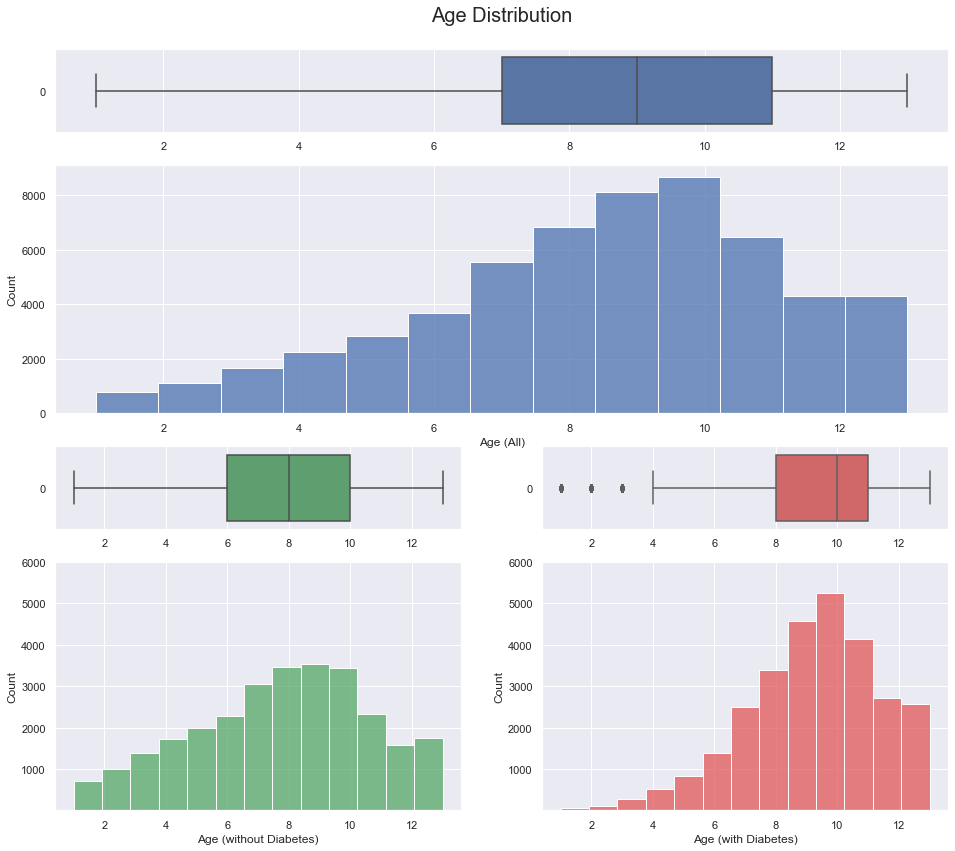

In [11]:
multiHistPlot('Age', 6000, 13, False)

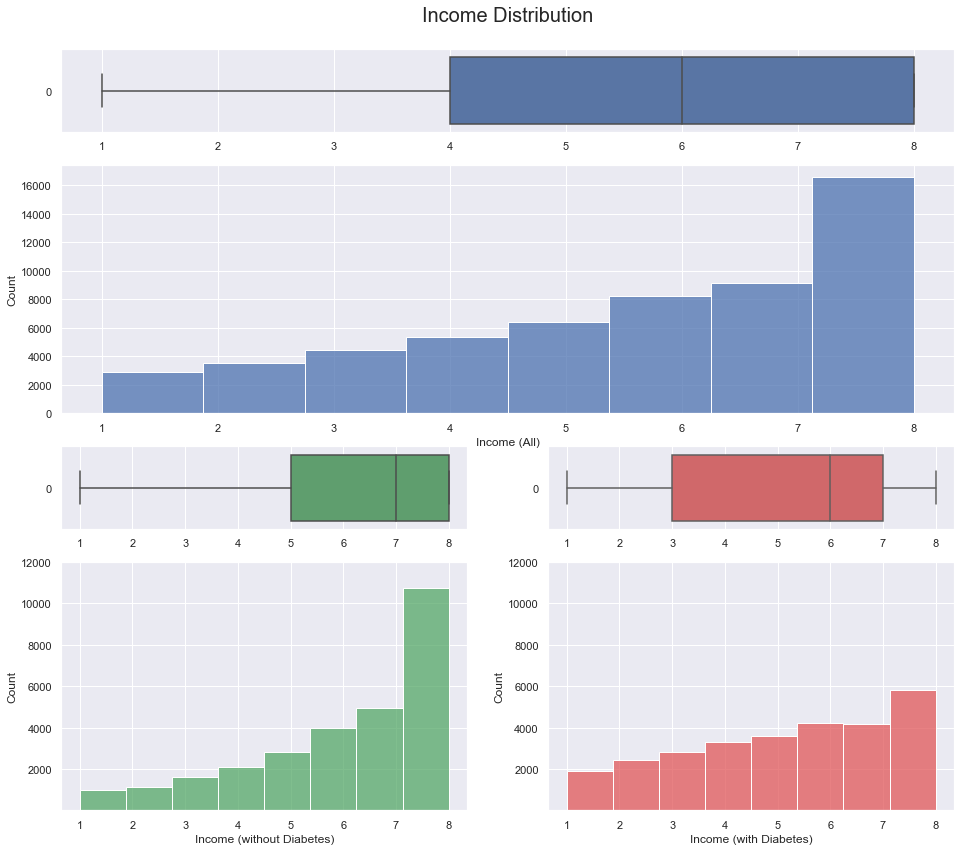

In [12]:
multiHistPlot('Income', 12000, 8, False)

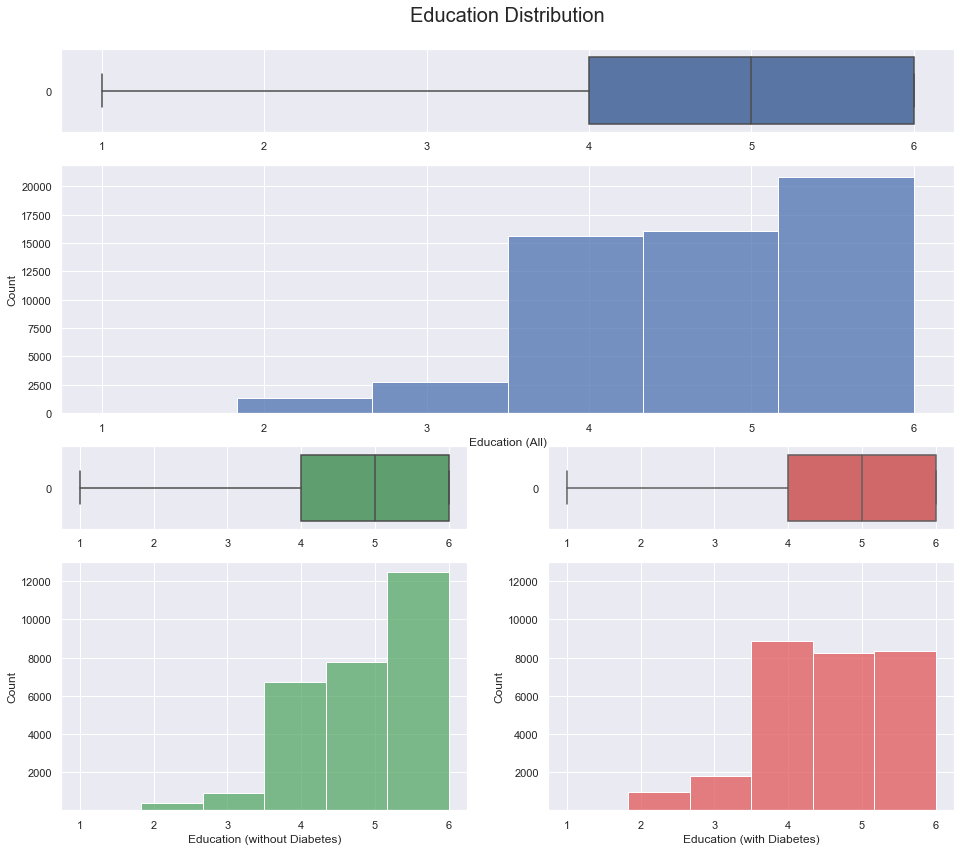

In [13]:
multiHistPlot('Education', 13000, 6, False)

### Analysis
Among the 3 variables: `Age` and `Income` are correlated to surveyees with / without diabetes while `Education` does not have any visible/strong correlation

`Age`  
- For surveyees **without diabetes**, 50% of them fall in between the **age group of 6 - 10** (age 45 to 69) with a wider spread.
- For surveyees **with diabetes**, 50% of them fall in between the **age group of 8 - 11** (age 55 to 74) and are generally less spread out.

`Income`  
- For surveyees **without diabetes**, they generally have a **higher income level**.
- For surveyees **with diabetes**, they generally have a **lower income level** with a wider spread.

### 3.2.3 Categorical Data with Non-Binary Response & Numerical Data (BMI distribution) 

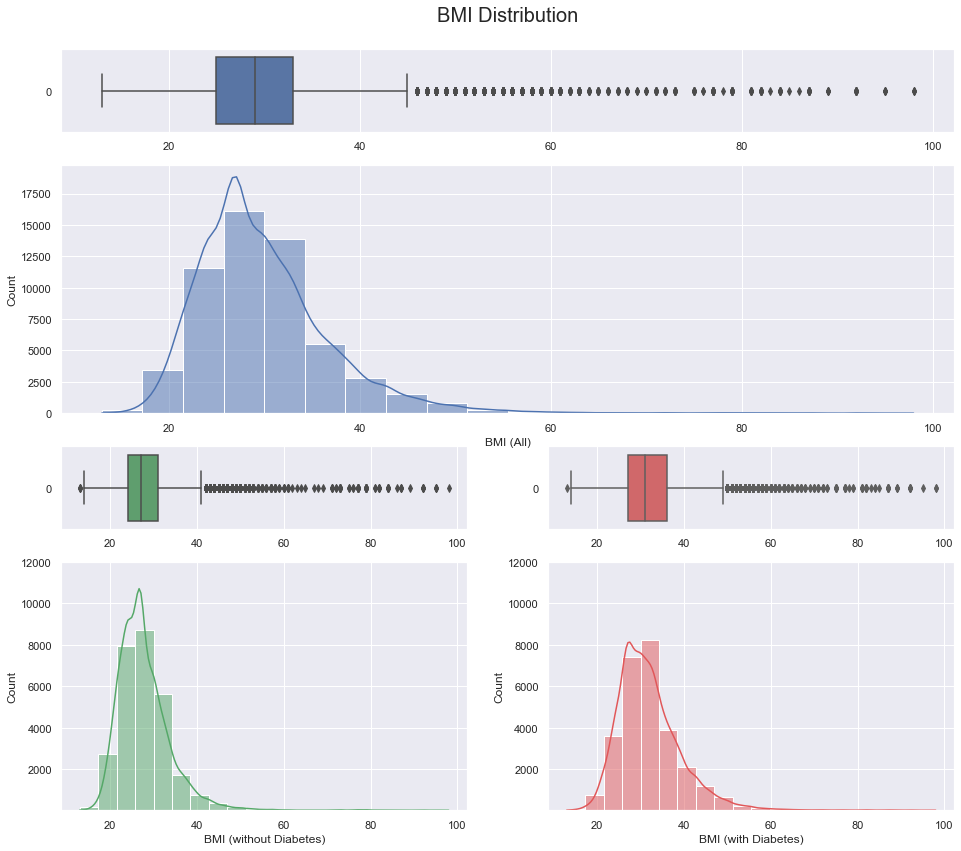

In [14]:
multiHistPlot('BMI', 12000, 20, True)

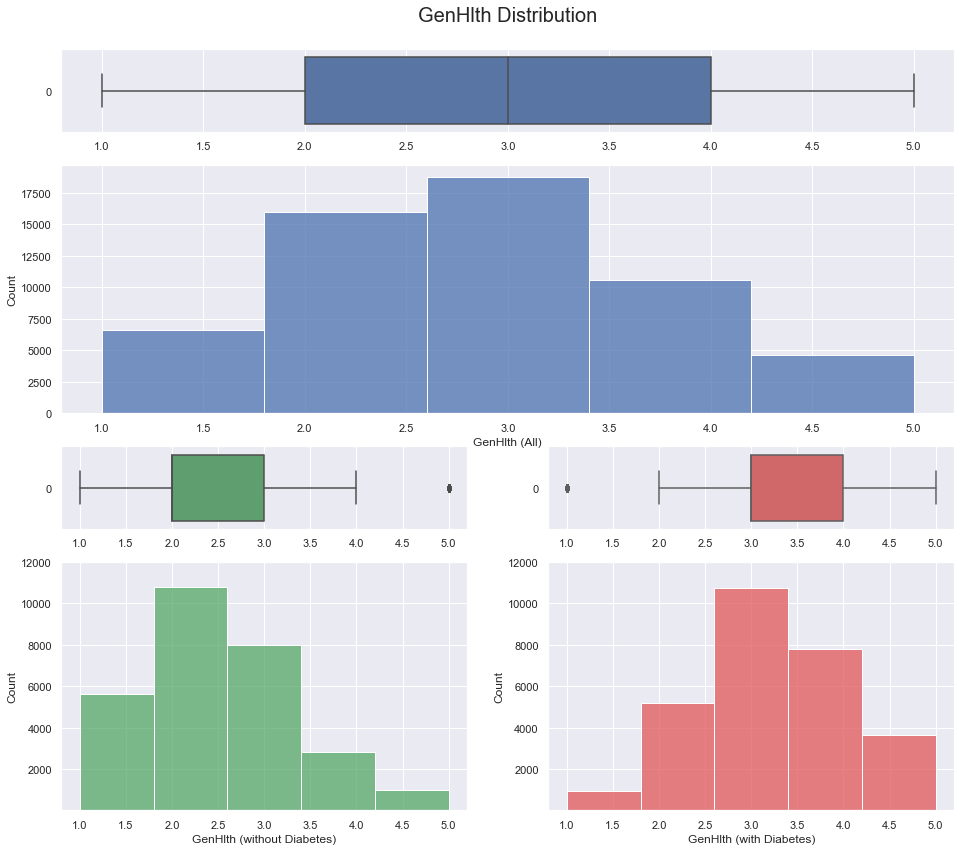

In [15]:
multiHistPlot('GenHlth', 12000, 5, False)

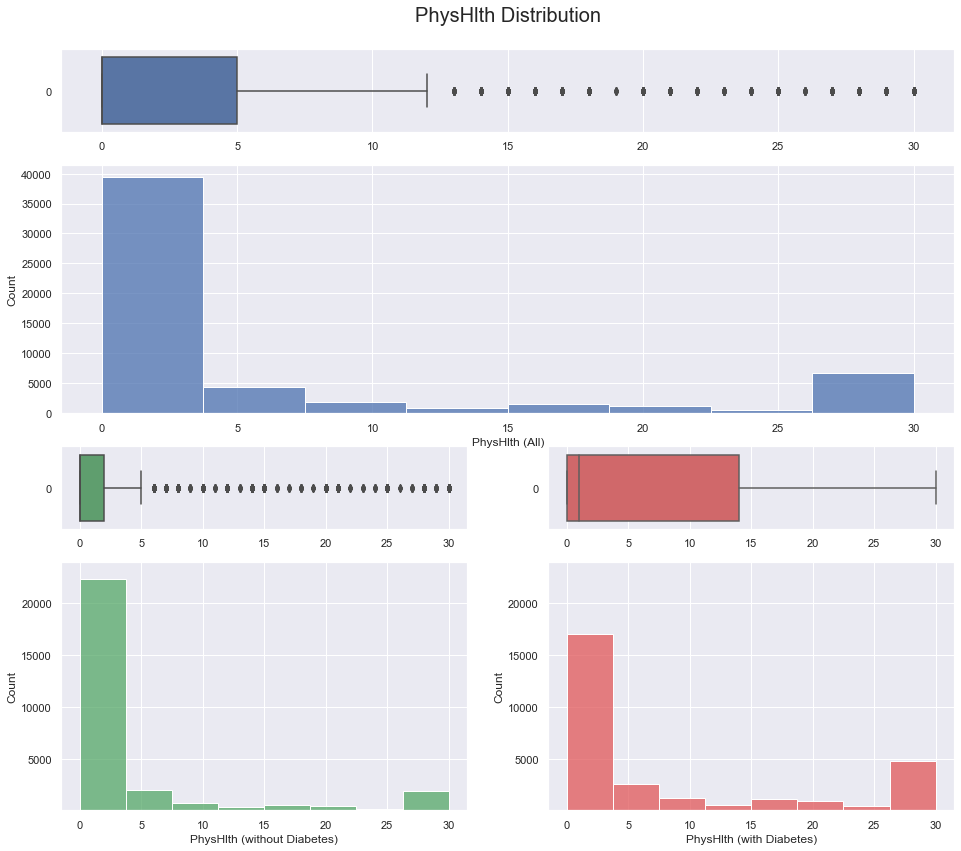

In [16]:
multiHistPlot('PhysHlth', 24000, 8, False)

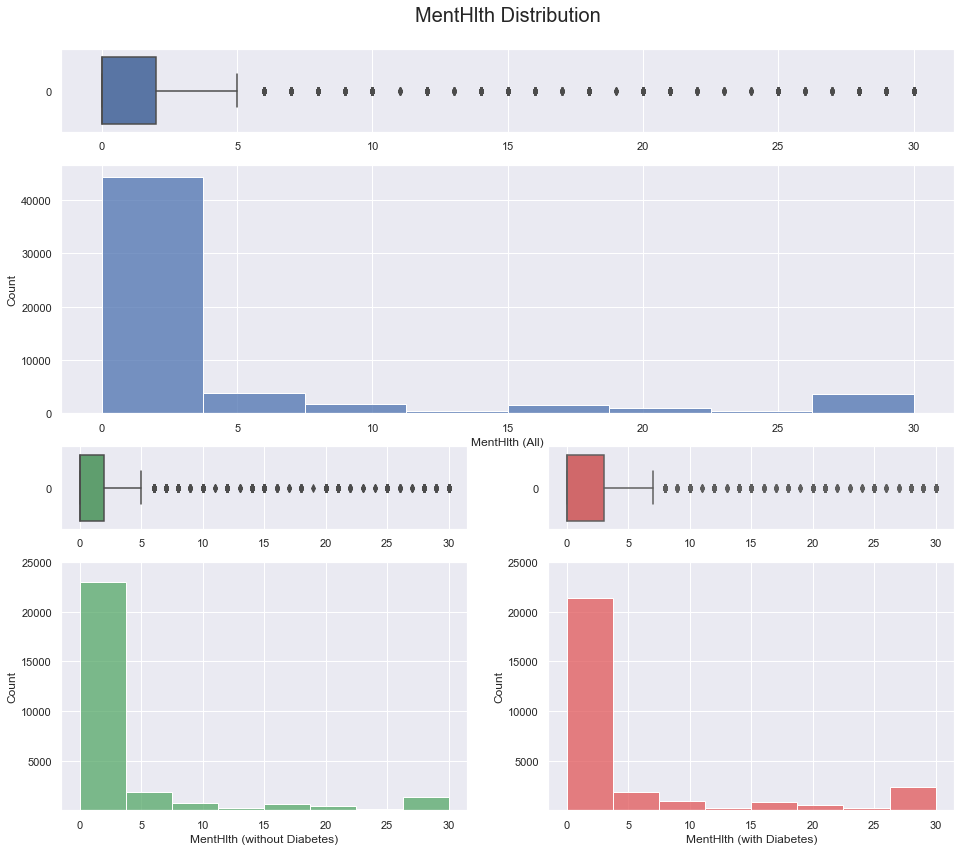

In [17]:
multiHistPlot('MentHlth', 25000, 8, False)

### Analysis

Among the 4 variables: `BMI`, `GenHlth` and `PhysHlth` are correlated to surveyees with / without diabetes while `MentlHlth` does not have any visible/strong correlation

`BMI`  
- For surveyees **without diabetes**, 50% of them fall in between the **lower BMI range of 25 - 30**.
- For surveyees **with diabetes**, 50% of them fall in between the **higher BMI range of 28 - 35**.

`GenHlth` (lower = better general health)
- For surveyees **without diabetes**, they generally have a **better general health rating (2 - 3)**.
- For surveyees **with diabetes**, they generally have a **worse general health rating (3 - 4)**.

`PhysHlth`
- For surveyees **without diabetes**, they generally have  **more days with poor physical health (0 - 2)**.
- For surveyees **with diabetes**, they generally have **lesser days with poor physical health (0 - 15)** with a higher spread.

### 3.2.4 Pearson's Correlation Matrix (Numerical Variable - BMI)

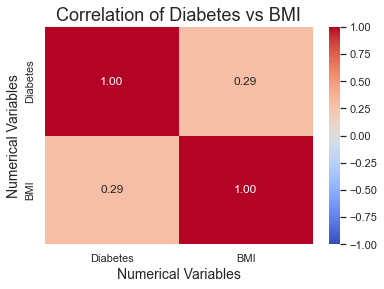

In [18]:
DiabetesDF=pd.DataFrame(train,columns=['Diabetes'])
BMIDF=pd.DataFrame(train,columns=['BMI'])
Diabetes_BMIDF=pd.concat([DiabetesDF,BMIDF],axis=1)

# Plot Heatmap based on ALL variables
fig, ax = plt.subplots()
sb.heatmap(Diabetes_BMIDF.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm', fmt=".2f")
plt.title('Correlation of Diabetes vs BMI', fontsize = 18)
plt.xlabel('Numerical Variables', fontsize = 14)
plt.ylabel('Numerical Variables', fontsize = 14)
plt.show()

### 3.2.5 Cramer's V Correlation Matrix (Categorical Variables)

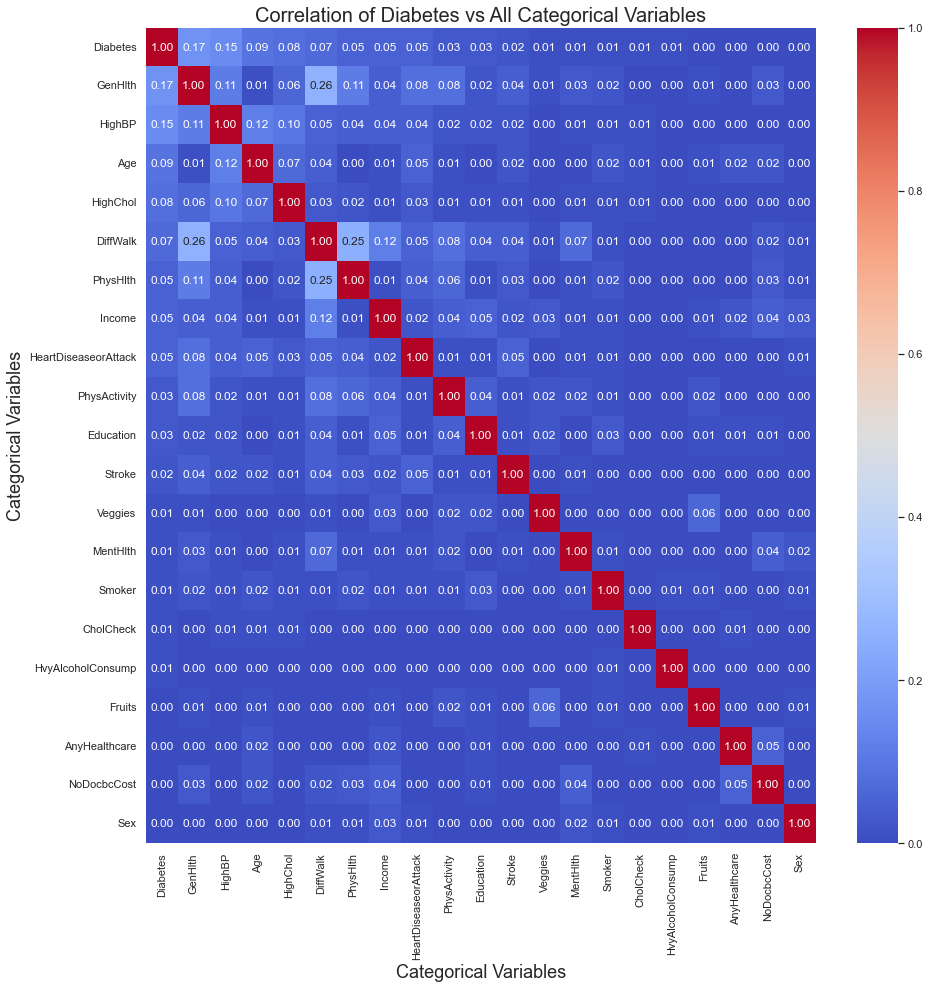

In [19]:
# Building Cramer's V function
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

# Building Correlation Matrix
catVariablesDF = train.drop(columns = ['BMI'])
rows= []
for var1 in catVariablesDF:
  col = []
  for var2 in catVariablesDF :
    cramers =cramers_V(catVariablesDF[var1], catVariablesDF[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)

cramers_results = np.array(rows)
cramersDF = pd.DataFrame(cramers_results, columns = catVariablesDF.columns, index =catVariablesDF.columns)


# Sort Heatmap based on correlation 0, 1
sortedDF = cramersDF.sort_values(by='Diabetes', axis=1, ascending=False)
sortedDFHead = sortedDF.columns.tolist()
sortedCorrDF = train[sortedDFHead]

# Building Correlation Matrix Again based on sorted DF
rows= []
for var1 in sortedCorrDF:
  col = []
  for var2 in sortedCorrDF :
    cramers =cramers_V(sortedCorrDF[var1], sortedCorrDF[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)

cramers_results = np.array(rows)
cramersDF = pd.DataFrame(cramers_results, columns = sortedCorrDF.columns, index =sortedCorrDF.columns)


# # Plot Heatmap based on ALL variables
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(cramersDF, vmin = 0, vmax = 1, annot = True, cmap = 'coolwarm', fmt=".2f")
plt.title('Correlation of Diabetes vs All Categorical Variables', fontsize = 20)
plt.xlabel('Categorical Variables', fontsize = 18)
plt.ylabel('Categorical Variables', fontsize = 18)
plt.show()

### Analysis from Pearson's Correlation and Cramer's V Correlation

#### Pearson's Correlation (Numerical)
- Even though this dataset only has one numerical variable `BMI`, we can see that there's moderate positive correlation `(0.29)` with our response variable `Diabetes` 

#### Cramer's V Correlation (Categorical)
- Variables such as `GenHlth`, `HighBP` and `Age` are most correlated with `Diabetes`
- Variables such as `Sex`, `NoDocbcCost` and `AnyHealthcare` has the least/no correlation with `Diabetes`
- We can also see that `DiffWalk` and `GenHlth` are also correlated with each other which does make sense as surveyees with difficulty walking often have poor general health

### 3.2.6 Overall Analysis and Observation from EDA

#### Group bar plots for categorical data with binary response
Variables such as
- `HighBP`
- `HighChol`
- `HeartDiseaseorAttack`
- `DiffWalk`
- `PhysActivity`  

are important variables that could cause diabetes.

#### Distribution plots  for categorical data with non-binary response and Numerical Data (BMI)
Demographics variables such as
- `Age`
- `Income`  

and Health Status variables such as
- `BMI`
- `GenHlth`
- `PhysHlth`

are important variables that could cause diabetes.

#### Pearson's Correlation Matrix (Numerical)
The matrix also shows that our numerical variable `BMI` is moderately correlated with `Diabetes`.

#### Cramer's V Correlation Matrix (Categorical)
The matrix also shows that among all 20 categorical variables, `GenHlth`, `HighBP`, `Age` and `HighChol` are the most correlated with `Diabetes`.

---
Therefore, just by observing and analysing data from exploratory data analysis, we can decide and focus on variables that we are interested in for our problem statement.

The following are the variables that we will be focusing on:
- `HighBP`
- `HighChol`
- `HeartDiseaseorAttack`
- `DiffWalk`
- `PhysActivity`
- `Age`
- `Income`
- `BMI`
- `GenHlth`
- `PhysHlth`

### 3.2.7 Removing Outliers before Proceeding on Further Analysis

Based on our observation on the boxplot on the distribution of `BMI`, we realised that there are many outliers with BMI values that are impossible to obtain.
Taking a closer look at the raw data from the data source, we realised that the surveyees could have responded incorrectly in terms of the unit of the weight (eg. lbs vs kg).

Therefore, we will be removing these outliers before proceeding on with further analysis.

Shape before removing outliers:	 (56553, 22)
Shape after removing outliers:	 (54803, 22)


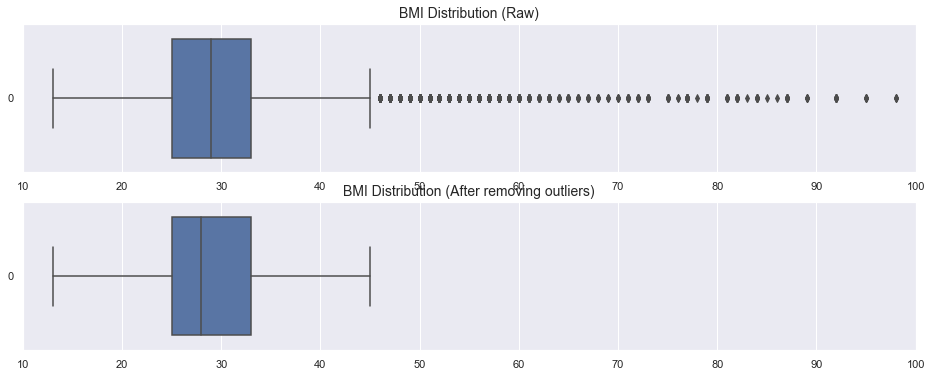

In [20]:
# Removing outliers
Q1 = train['BMI'].quantile(0.25)
Q3 = train['BMI'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
cleanDF = train[~((train['BMI'] < (Q1 - 1.5 * IQR)) |(train['BMI'] > (Q3 + 1.5 * IQR)))]

print('Shape before removing outliers:\t',train.shape)
print('Shape after removing outliers:\t',cleanDF.shape)

# Boxplots
f, axes = plt.subplots(2, 1, figsize=(16, 6), gridspec_kw={'height_ratios': [1, 1]})

ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0))

sb.boxplot(data = train['BMI'].values, orient = "h", ax = ax1)
sb.boxplot(data = cleanDF['BMI'].values, orient = "h", ax = ax2)

ax1.set_title('BMI Distribution (Raw)', fontsize = 14)
ax2.set_title('BMI Distribution (After removing outliers)', fontsize = 14)
ax1.set_xlim(10,100)
ax2.set_xlim(10,100)

plt.show()

---
## 4. Model Training

We will be training 3 different **Supervised Classification** machine learning models on the training dataset to predict the most important variables.
- **Model 1: Decision Tree**  
It is a simple, decision making-diagram
- **Model 2: Random Forest**  
Random forests are a large number of trees, combined (using averages or “majority rules”) at the **end of the process**
- **Model 3: Gradient Boosting**  
Gradient boosting machines also combine decision trees, but start the combining process **at the beginning**, instead of at the end.

In [21]:
#Data for ML
X_train = cleanDF.drop(columns = ['Diabetes'])
y_train = cleanDF['Diabetes']
X_test = test.drop(columns = ['Diabetes'])
y_test = test['Diabetes']
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54803, 21), (14139, 21), (54803,), (14139,))

### 4.1 Training Model 1 - Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.2 Training Model 2 - Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
randForest = RandomForestClassifier()
randForest.fit(X_train, y_train)

RandomForestClassifier()

### 4.3 Training Model 3 - Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gradBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,  max_depth=1, random_state=0)
gradBoost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

---
## 5. Model Evaluation (Training Dataset)

We will then evaluate the models using the following metrics:
- Classification Accuracy
- True Positive Rate 
- False Positive Rate
- True Negative Rate
- False Negative Rate 

and derive the importance of the variables using `Feature Importance` function

In [25]:
def cal(arr):
    FP = arr[0][1]
    FN = arr[1][0]
    TP = arr[1][1]
    TN = arr[0][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = round(TP/(TP+FN)*100, 1)

    # Specificity or true negative rate
    TNR = round(TN/(TN+FP)*100, 1)

    # Fall out or false positive rate
    FPR = round(FP/(FP+TN)*100, 1)

    # False negative rate
    FNR = round(FN/(TP+FN)*100, 1)
    
    print("True Positive Rate:",TPR,"%","\nFalse Positive Rate:",FPR,"%")
    print("True Negative Rate:",TNR,"%","\nFalse Negative Rate:",FNR,"%")
    
    return TPR, TNR, FPR, FNR

columnName = {'Model': [], 'Dataset': [], 'Accuracy %': [], 'TPR %': [], 'TNR %': [], 'FPR %': [], 'FNR %': []}
confusionMat_DF = pd.DataFrame(data=columnName)

In [26]:
#function for confusion matrix and classification accuracy
from sklearn.metrics import confusion_matrix

def confusionMat(classifier, name):
    global confusionMat_DF
    
    if (classifier == dectree):
        model = 'Decision Tree'
    elif (classifier == randForest):
        model = 'Random Forest'
    else:
        model = 'Gradient Boost'
    
    
    if (name == "Train") or (name == "Train (Top 5)"):
        # Predict values
        y_train_pred = classifier.predict(X_train)

        # Check the Goodness of Fit
        print("Goodness of Fit of Model \tTrain Dataset")
        accuracy = round(classifier.score(X_train, y_train)*100, 1)
        print("Classification Accuracy \t:", accuracy,"%")
        print()        
        #Print the positive negative rates
        TPR, TNR, FPR, FNR = cal(confusion_matrix(y_train, y_train_pred))
        print()
        # Plot the Confusion Matrix 
        sb.heatmap(confusion_matrix(y_train, y_train_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})      
        
    elif (name == "Test") or (name == "Test (Top 5 Model)"):
        # Predict values
        y_test_pred = classifier.predict(X_test)

        # Check the Goodness of Fit
        print("Goodness of Fit of Model \tTest Dataset")
        accuracy = round(classifier.score(X_test, y_test)*100, 1)
        print("Classification Accuracy \t:",accuracy,"%")
        print()        
        #Print the positive negative rates
        TPR, TNR, FPR, FNR = cal(confusion_matrix(y_test, y_test_pred))
        print()
        # Plot the Confusion Matrix 
        sb.heatmap(confusion_matrix(y_test, y_test_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})
    
        
    tempDF = pd.DataFrame([[model, name, accuracy, TPR, TNR, FPR, FNR]], 
                           columns=['Model', 'Dataset', 'Accuracy %', 'TPR %', 'TNR %', 'FPR %', 'FNR %'])
    confusionMat_DF = confusionMat_DF.append(tempDF)

In [27]:
# Function for Barplots for confusion matrix comparison

def confusionMatPlot(df, group):
    # Grid
    if group == False:
        f, axes = plt.subplots(2, 3, figsize=(16, 8), gridspec_kw={'height_ratios': [1, 1]})
    else:
        f, axes = plt.subplots(2, 3, figsize=(16, 12), gridspec_kw={'height_ratios': [1, 1]})
    ax1 = plt.subplot2grid((2,3), (0,0), rowspan = 2)
    ax1.set_ylim(1,100)
    ax2 = plt.subplot2grid((2,3), (0,1))
    ax2.set_ylim(1,100)
    ax3 = plt.subplot2grid((2,3), (0,2))
    ax3.set_ylim(1,100)
    ax4 = plt.subplot2grid((2,3), (1,1))
    ax4.set_ylim(1,45)
    ax5 = plt.subplot2grid((2,3), (1,2))
    ax5.set_ylim(1,45)

    if group == False:
        bar1 = sb.barplot(x='Model', y='Accuracy %', data=df, ax = ax1)
        bar2 = sb.barplot(x='Model', y='TPR %', data=df, ax = ax2)
        bar3 = sb.barplot(x='Model', y='TNR %', data=df, ax = ax3)
        bar4 = sb.barplot(x='Model', y='FPR %', data=df, ax = ax4)
        bar5 = sb.barplot(x='Model', y='FNR %', data=df, ax = ax5)
    else:
        bar1 = sb.barplot(x='Model', y='Accuracy %', hue='Dataset', data=df, ax = ax1)
        bar2 = sb.barplot(x='Model', y='TPR %', hue='Dataset', data=df, ax = ax2)
        bar3 = sb.barplot(x='Model', y='TNR %', hue='Dataset', data=df, ax = ax3)
        bar4 = sb.barplot(x='Model', y='FPR %', hue='Dataset', data=df, ax = ax4)
        bar5 = sb.barplot(x='Model', y='FNR %', hue='Dataset', data=df, ax = ax5)
        
    bar1.bar_label(bar1.containers[0])
    bar2.bar_label(bar2.containers[0])
    bar3.bar_label(bar3.containers[0])
    bar4.bar_label(bar4.containers[0])
    bar5.bar_label(bar5.containers[0])
    
    if group == True:
        bar1.bar_label(bar1.containers[1])
        bar2.bar_label(bar2.containers[1])
        bar3.bar_label(bar3.containers[1])
        bar4.bar_label(bar4.containers[1])
        bar5.bar_label(bar5.containers[1])
        bar1.legend(loc='lower right')
        bar2.legend(loc='lower right')
        bar3.legend(loc='lower right')
        bar4.legend(loc='lower right')
        bar5.legend(loc='lower right')
    
    plt.show()

### 5.1.1 Evaluation on Model 1 - Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 99.4 %

True Positive Rate: 98.9 % 
False Positive Rate: 0.1 %
True Negative Rate: 99.9 % 
False Negative Rate: 1.1 %



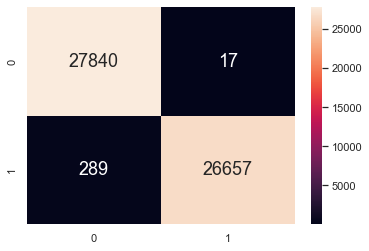

In [28]:
#Decision tree
confusionMat(dectree, "Train")

### 5.1.2 Feature Importance of Model 1 - Decision Tree

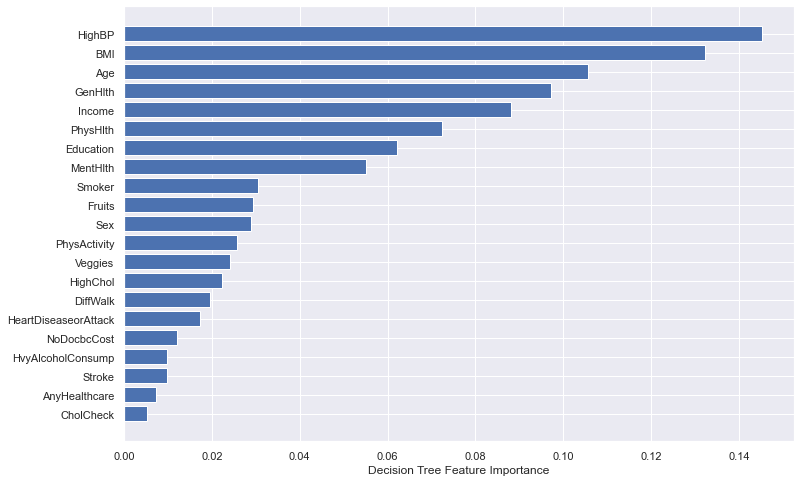

In [29]:
#Feature importance based on mean decrease in impurity
dectree_impt = dectree.feature_importances_
#Sort in descending order
sort_index = dectree_impt.argsort()
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(X_train.columns[sort_index], dectree_impt[sort_index]) 
plt.xlabel("Decision Tree Feature Importance")
plt.show()

### 5.2.1 Evaluation on Model 2 - Random Forest

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 99.4 %

True Positive Rate: 99.3 % 
False Positive Rate: 0.4 %
True Negative Rate: 99.6 % 
False Negative Rate: 0.7 %



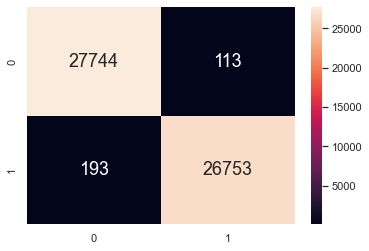

In [30]:
#Random Forest
confusionMat(randForest, "Train")

### 5.2.2 Feature Importance of Model 2 - Random Forest

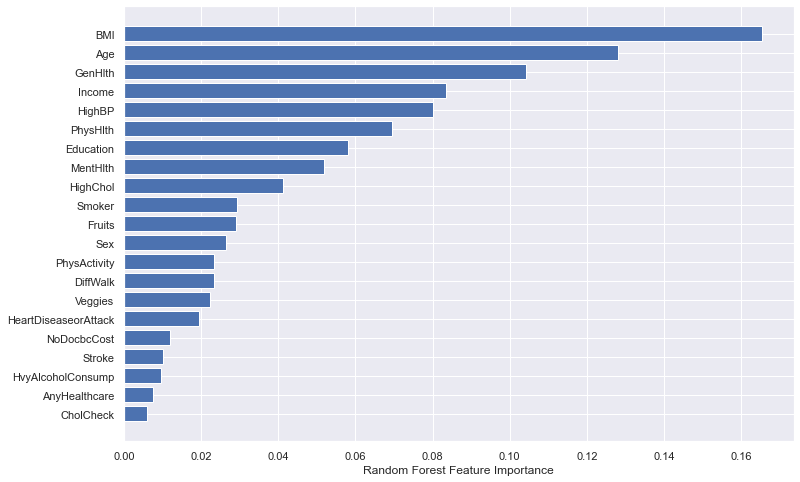

In [31]:
#Feature importance based on mean decrease in impurity
randForest_impt = randForest.feature_importances_
#Sort in descending order
sort_index = randForest_impt.argsort()
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(X_train.columns[sort_index], randForest_impt[sort_index]) 
plt.xlabel("Random Forest Feature Importance")
plt.show()

### 5.3.1 Evaluation on Model 3 - Gradient Boosting

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 74.9 %

True Positive Rate: 77.0 % 
False Positive Rate: 27.1 %
True Negative Rate: 72.9 % 
False Negative Rate: 23.0 %



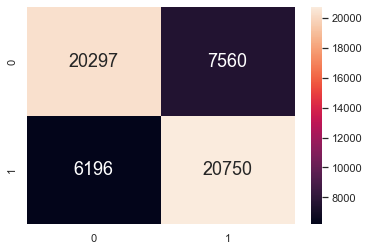

In [32]:
#Gradient Boosting
confusionMat(gradBoost, "Train")

### 5.3.2 Feature Importance of Model 3 - Gradient Boosting

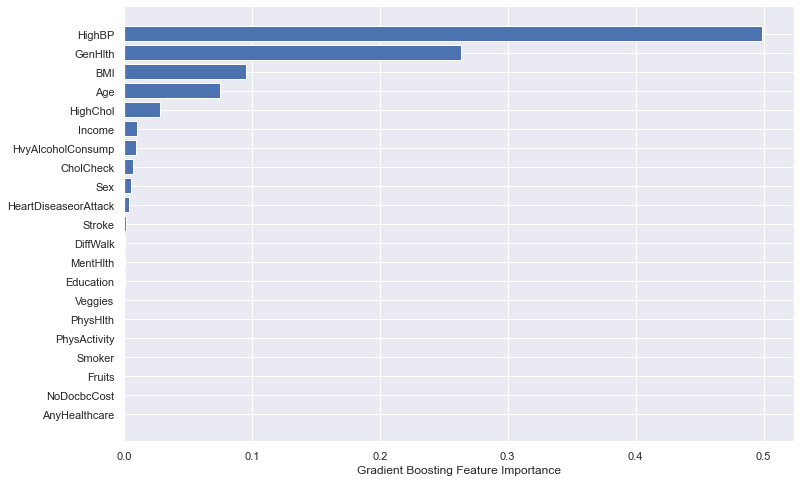

In [33]:
gradBoost_impt = gradBoost.feature_importances_
#Sort in descending order
sort_index = gradBoost_impt.argsort()
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(X_train.columns[sort_index], gradBoost_impt[sort_index]) 
plt.xlabel("Gradient Boosting Feature Importance")
plt.show()

### 5.4 Top 5 Most Important Variables (Training Dataset)

| Feature Importance | Model 1: Decision Tree | Model 2: Random Forest | Model 3: Gradient Boosting
| :- | :-: | :-: | :-: |
| Top 1 | HighBP | BMI | HighBP |
| Top 2 | BMI | Age | GenHlth |
| Top 3 | Age | GenHlth | BMI |
| Top 4 | GenHlth | Income | Age |
| Top 5 | Income | HighBP | HighChol |

Based on 3 models above, we can see that `HighBP`, `BMI`, `GenHlth`, `Age` and `Income` are some of the most important variables in predicting `Diabetes`




### 5.5 Model Evaluation Overview (Training Dataset)

In [34]:
confusionMat_DF.head(3)

,Model,Dataset,Accuracy %,TPR %,TNR %,FPR %,FNR %
0,Decision Tree,Train,99.4,98.9,99.9,0.1,1.1
0,Random Forest,Train,99.4,99.3,99.6,0.4,0.7
0,Gradient Boost,Train,74.9,77.0,72.9,27.1,23.0


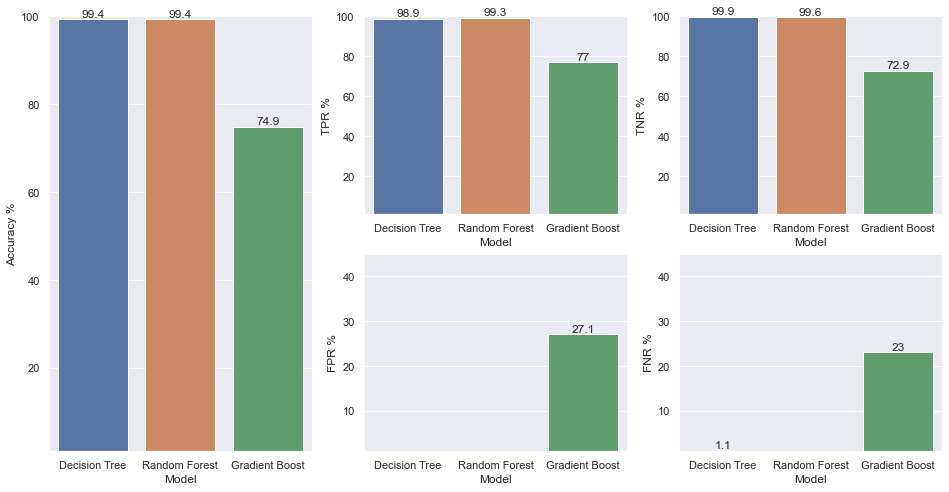

In [35]:
confusionMatPlot(confusionMat_DF.head(3), False)

We can see that both **Decision Tree** and **Random Forest** achieved extremely high `Accuracy`, `TPR` and `TNR` and extremely low `NPR` and `NFR`, this might be due to the models **overfitting** to the training dataset since **all** variables are used to train the models.

---
## 6. Model Deployment and Evaluation (Test Dataset)
We will deploy and evaulate the model trained on test dataset

### 6.1 Model 1 - Decision Tree

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 65.7 %

True Positive Rate: 65.1 % 
False Positive Rate: 33.7 %
True Negative Rate: 66.3 % 
False Negative Rate: 34.9 %



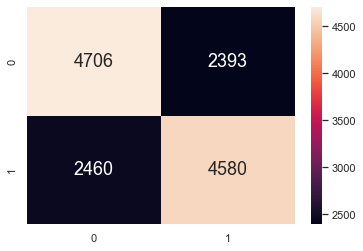

In [36]:
#Decision tree
confusionMat(dectree, "Test")

### 6.2 Model 2 - Random Forest

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 73.8 %

True Positive Rate: 77.5 % 
False Positive Rate: 29.9 %
True Negative Rate: 70.1 % 
False Negative Rate: 22.5 %



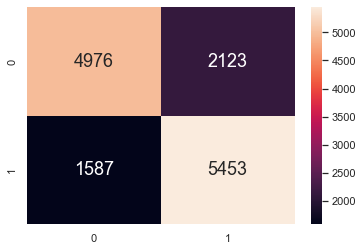

In [37]:
#Random Forest
confusionMat(randForest, "Test")

### 6.3 Model 3 - Gradient Boosting

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 75.3 %

True Positive Rate: 78.1 % 
False Positive Rate: 27.5 %
True Negative Rate: 72.5 % 
False Negative Rate: 21.9 %



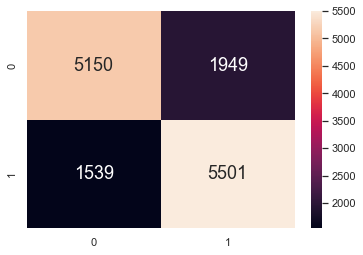

In [38]:
#Gradient Boosting
confusionMat(gradBoost, "Test")

### 6.4 Model Evaluation Overview (Test Dataset)

In [39]:
confusionMat_DF.tail(3)

,Model,Dataset,Accuracy %,TPR %,TNR %,FPR %,FNR %
0,Decision Tree,Test,65.7,65.1,66.3,33.7,34.9
0,Random Forest,Test,73.8,77.5,70.1,29.9,22.5
0,Gradient Boost,Test,75.3,78.1,72.5,27.5,21.9


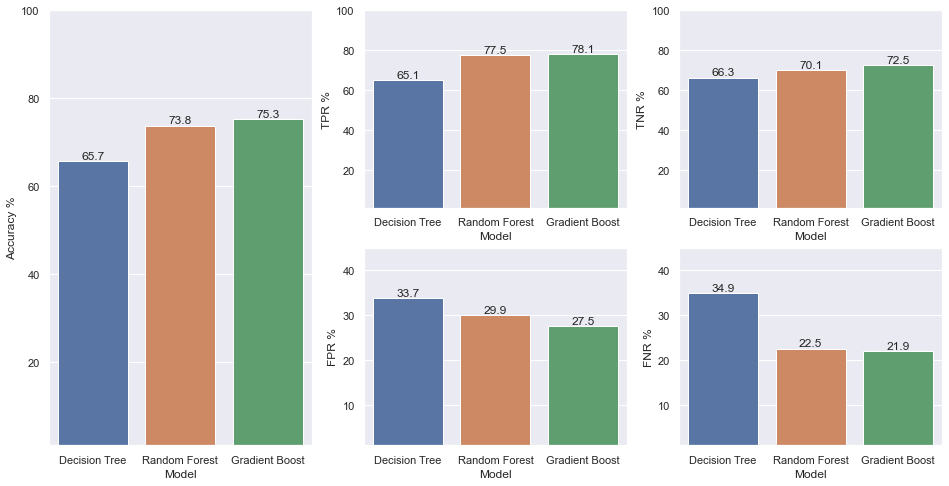

In [40]:
confusionMatPlot(confusionMat_DF.tail(3), False)

### 6.5 Model Evaluation (Training vs Test)

In [41]:
confusionMat_DF.head(6)

,Model,Dataset,Accuracy %,TPR %,TNR %,FPR %,FNR %
0,Decision Tree,Train,99.4,98.9,99.9,0.1,1.1
0,Random Forest,Train,99.4,99.3,99.6,0.4,0.7
0,Gradient Boost,Train,74.9,77.0,72.9,27.1,23.0
0,Decision Tree,Test,65.7,65.1,66.3,33.7,34.9
0,Random Forest,Test,73.8,77.5,70.1,29.9,22.5
0,Gradient Boost,Test,75.3,78.1,72.5,27.5,21.9


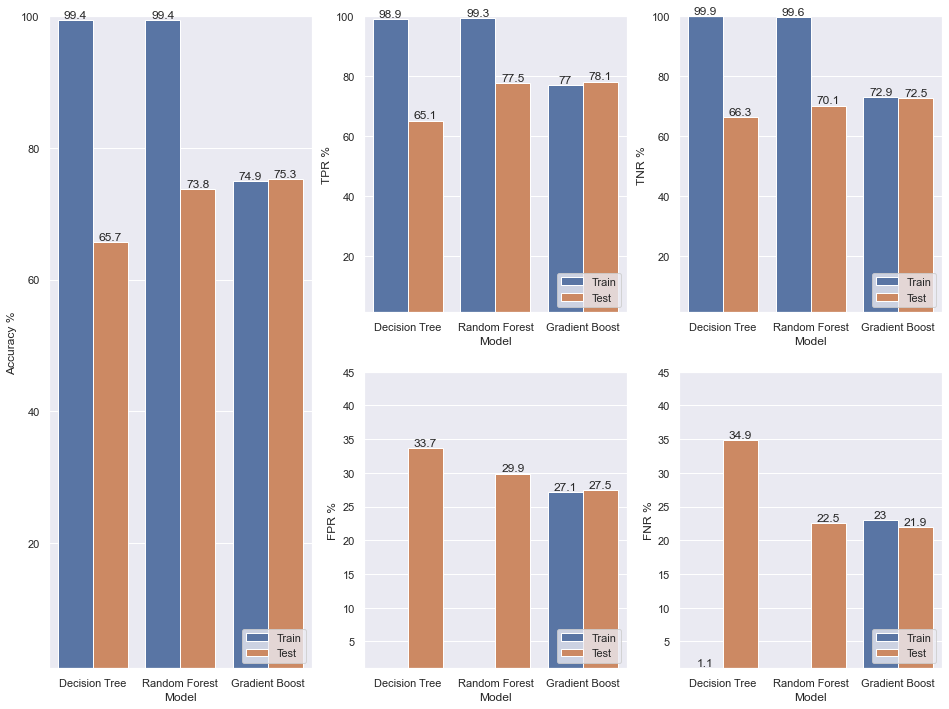

In [42]:
confusionMatPlot(confusionMat_DF.head(6), True)

After running the models on the test dataset, we can see that for **Decision Tree** and **Random Forest**, the `Accuracy`, `TPR` and `TNR` have decreased significantly while `FPR` and `FNR` have also increased significantly.  

This shows that these 2 models have **overfitted** to our training dataset. This is because the performance on the training dataset is improved at the cost of worse performance on test dataset.

## 7. Re-training Models (using only its Top 5 variables)
Since we have deduced the most important variables in predicting diabetes using the models, we will re-train the models using only these variables instead of all variables to reduce overfitting issues.

In [43]:
#new data with only top 5 for dectree and randForest
X_train=pd.DataFrame(cleanDF,columns=['HighBP', 'BMI', 'Age', 'GenHlth', 'Income'])
X_test =pd.DataFrame(test,columns=['HighBP', 'BMI', 'Age', 'GenHlth', 'Income'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54803, 5), (14139, 5), (54803,), (14139,))

### 7.1 Re-training Model 1 - Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 80.3 %

True Positive Rate: 78.3 % 
False Positive Rate: 17.8 %
True Negative Rate: 82.2 % 
False Negative Rate: 21.7 %



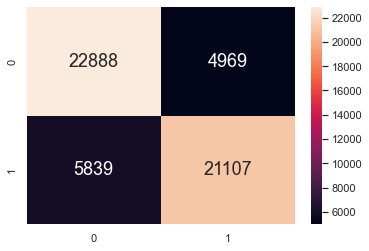

In [44]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
confusionMat(dectree, "Train (Top 5)")

### 7.2 Re-training Model 2 - Random Forest

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 80.3 %

True Positive Rate: 82.2 % 
False Positive Rate: 21.6 %
True Negative Rate: 78.4 % 
False Negative Rate: 17.8 %



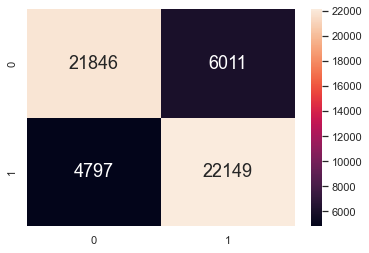

In [45]:
randForest = RandomForestClassifier()
randForest.fit(X_train, y_train)
confusionMat(randForest, "Train (Top 5)")

### 7.3 Re-training Model 3 - Gradient Boosting

In [46]:
#new data with only top 5 for gradient boosting
X_train=pd.DataFrame(cleanDF,columns=['HighBP', 'BMI', 'Age', 'GenHlth', 'HighChol'])
X_test =pd.DataFrame(test,columns=['HighBP', 'BMI', 'Age', 'GenHlth', 'HighChol'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54803, 5), (14139, 5), (54803,), (14139,))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 74.2 %

True Positive Rate: 76.6 % 
False Positive Rate: 28.0 %
True Negative Rate: 72.0 % 
False Negative Rate: 23.4 %



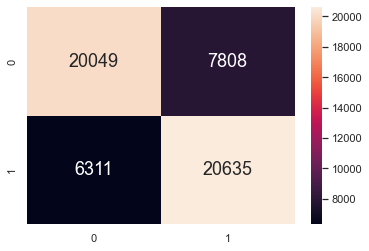

In [47]:
gradBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,  max_depth=1, random_state=0)
gradBoost.fit(X_train, y_train)
confusionMat(gradBoost, "Train (Top 5)")

### 7.4 Model Evaluation Overview (Training Dataset with Top 5 Variables)

In [48]:
confusionMat_DF.tail(3)

,Model,Dataset,Accuracy %,TPR %,TNR %,FPR %,FNR %
0,Decision Tree,Train (Top 5),80.3,78.3,82.2,17.8,21.7
0,Random Forest,Train (Top 5),80.3,82.2,78.4,21.6,17.8
0,Gradient Boost,Train (Top 5),74.2,76.6,72.0,28.0,23.4


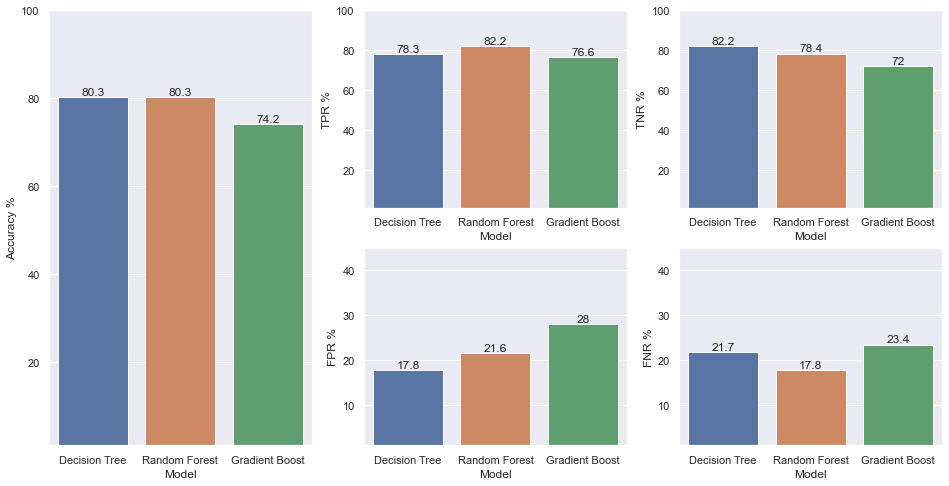

In [49]:
confusionMatPlot(confusionMat_DF.tail(3), False)

### 7.5 Comparison (New Model vs Old Model)

In [50]:
pd.concat([confusionMat_DF.head(3), confusionMat_DF.tail(3)])

,Model,Dataset,Accuracy %,TPR %,TNR %,FPR %,FNR %
0,Decision Tree,Train,99.4,98.9,99.9,0.1,1.1
0,Random Forest,Train,99.4,99.3,99.6,0.4,0.7
0,Gradient Boost,Train,74.9,77.0,72.9,27.1,23.0
0,Decision Tree,Train (Top 5),80.3,78.3,82.2,17.8,21.7
0,Random Forest,Train (Top 5),80.3,82.2,78.4,21.6,17.8
0,Gradient Boost,Train (Top 5),74.2,76.6,72.0,28.0,23.4


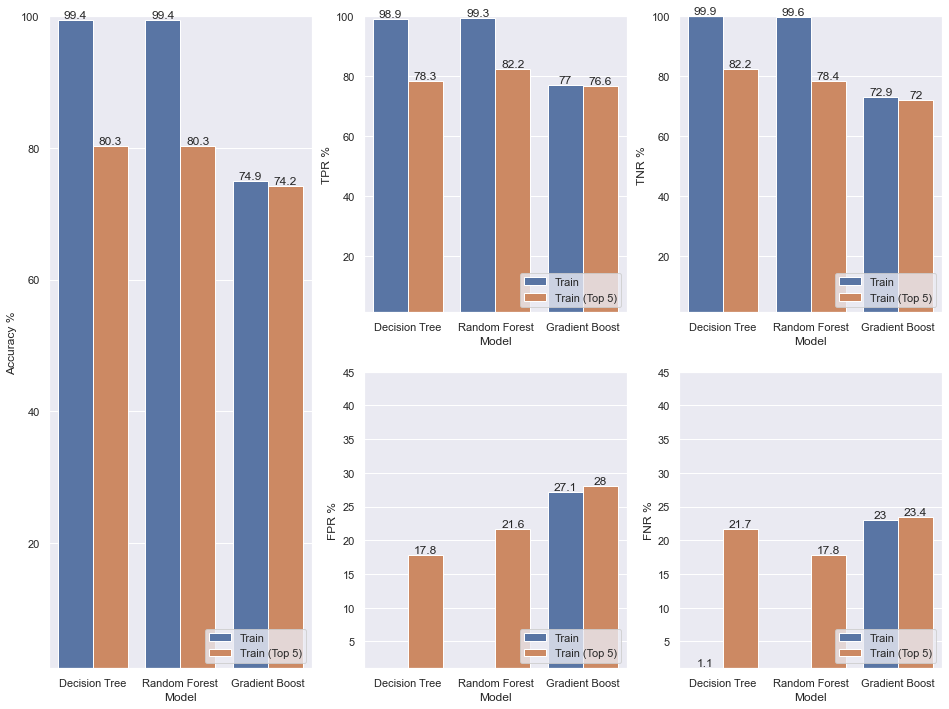

In [51]:
confusionMatPlot(pd.concat([confusionMat_DF.head(3), confusionMat_DF.tail(3)]), True)

For **Decision Tree** and **Random Forest**, we can see that the `Accuracy`, `TPR` and `TNR` have decreased and `FPR` and `FNR` have increased as compared to the previous model which was **overfitted**

## 8. Re-testing Models (Test Dataset)
Using the newly trained models, we will re-deploy them on our test dataset and evaluate if the models are overfitted.

### 8.1 Re-testing Model - Decision Tree

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 64.5 %

True Positive Rate: 68.2 % 
False Positive Rate: 39.1 %
True Negative Rate: 60.9 % 
False Negative Rate: 31.8 %



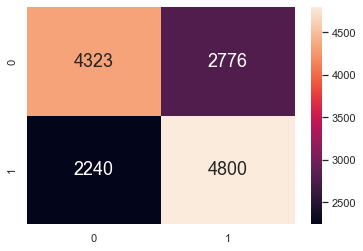

In [52]:
confusionMat(dectree, "Test (Top 5 Model)")

### 8.2 Re-testing Model - Random Forest

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 67.6 %

True Positive Rate: 76.2 % 
False Positive Rate: 41.0 %
True Negative Rate: 59.0 % 
False Negative Rate: 23.8 %



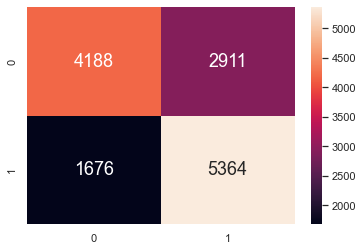

In [53]:
confusionMat(randForest, "Test (Top 5 Model)")

### 8.3 Re-testing Model - Gradient Boost

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 74.7 %

True Positive Rate: 77.6 % 
False Positive Rate: 28.3 %
True Negative Rate: 71.7 % 
False Negative Rate: 22.4 %



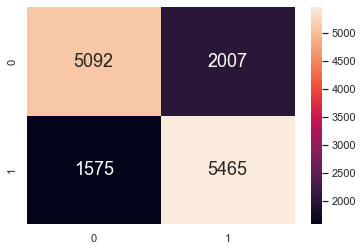

In [54]:
confusionMat(gradBoost, "Test (Top 5 Model)")

### 8.4 Model Evaluation Overall

In [55]:
confusionMat_DF.tail(3)

,Model,Dataset,Accuracy %,TPR %,TNR %,FPR %,FNR %
0,Decision Tree,Test (Top 5 Model),64.5,68.2,60.9,39.1,31.8
0,Random Forest,Test (Top 5 Model),67.6,76.2,59.0,41.0,23.8
0,Gradient Boost,Test (Top 5 Model),74.7,77.6,71.7,28.3,22.4


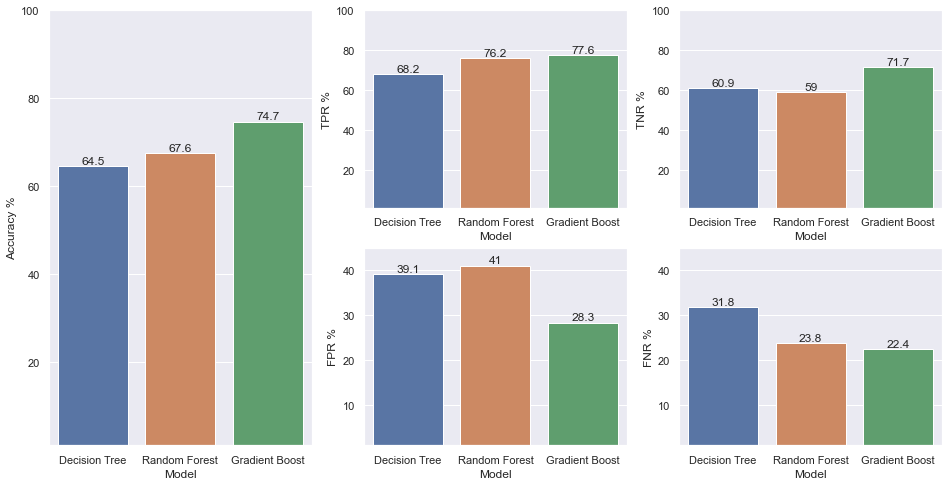

In [56]:
confusionMatPlot(confusionMat_DF.tail(3), False)

### 8.5 Comparison (New Model on Train Dataset vs New Model on Test Dataset)

In [57]:
pd.concat([confusionMat_DF[confusionMat_DF['Dataset']=='Train (Top 5)'],confusionMat_DF.tail(3)])

,Model,Dataset,Accuracy %,TPR %,TNR %,FPR %,FNR %
0,Decision Tree,Train (Top 5),80.3,78.3,82.2,17.8,21.7
0,Random Forest,Train (Top 5),80.3,82.2,78.4,21.6,17.8
0,Gradient Boost,Train (Top 5),74.2,76.6,72.0,28.0,23.4
0,Decision Tree,Test (Top 5 Model),64.5,68.2,60.9,39.1,31.8
0,Random Forest,Test (Top 5 Model),67.6,76.2,59.0,41.0,23.8
0,Gradient Boost,Test (Top 5 Model),74.7,77.6,71.7,28.3,22.4


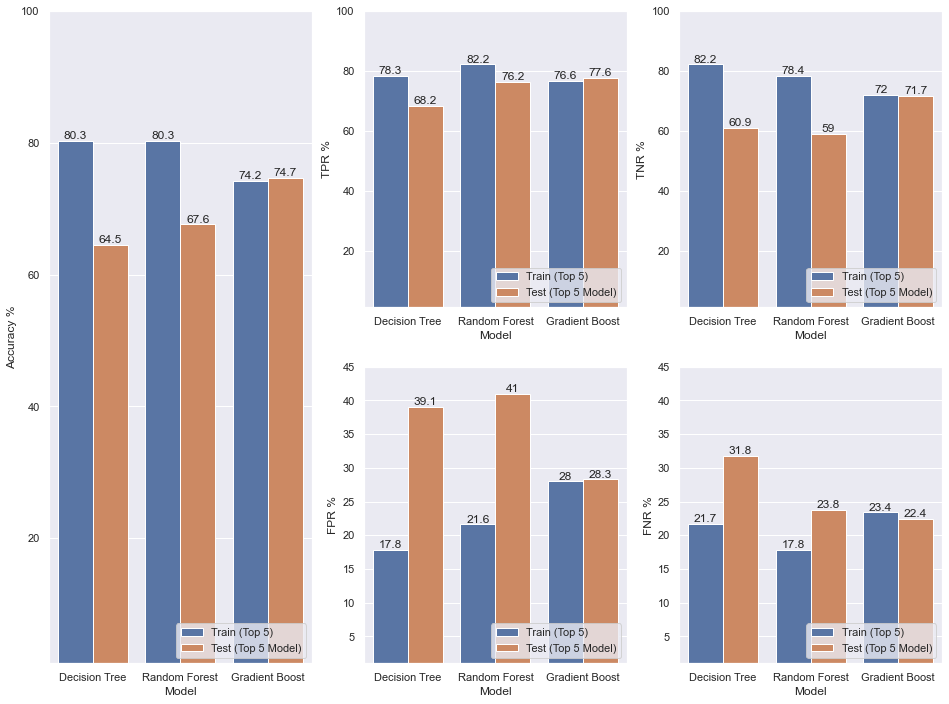

In [58]:
confusionMatPlot(pd.concat([confusionMat_DF[confusionMat_DF['Dataset']=='Train (Top 5)'],confusionMat_DF.tail(3)]), True)

After running the new model on the test dataset, we can see that **the difference between Train vs Test in each metric is not as significant as the previous model**, this shows that we have improved the model performance by reducing overfitting issues. 

### 8.6 Comparison (Old Model on Test Dataset vs New Model on Test Dataset)

In [59]:
pd.concat([confusionMat_DF[confusionMat_DF['Dataset']=='Test'],confusionMat_DF.tail(3)])

,Model,Dataset,Accuracy %,TPR %,TNR %,FPR %,FNR %
0,Decision Tree,Test,65.7,65.1,66.3,33.7,34.9
0,Random Forest,Test,73.8,77.5,70.1,29.9,22.5
0,Gradient Boost,Test,75.3,78.1,72.5,27.5,21.9
0,Decision Tree,Test (Top 5 Model),64.5,68.2,60.9,39.1,31.8
0,Random Forest,Test (Top 5 Model),67.6,76.2,59.0,41.0,23.8
0,Gradient Boost,Test (Top 5 Model),74.7,77.6,71.7,28.3,22.4


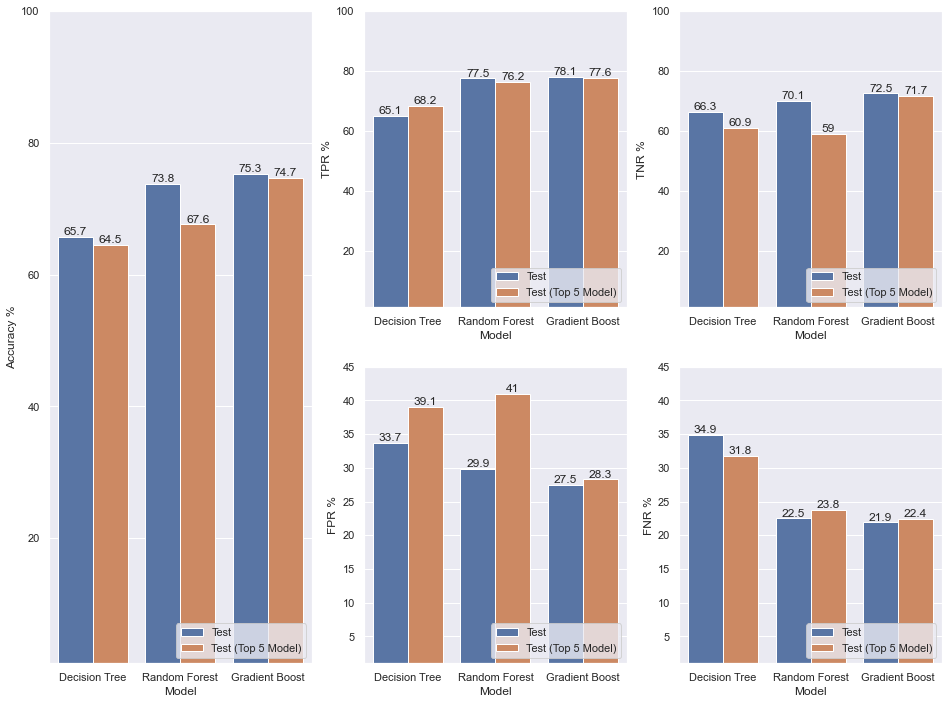

In [60]:
confusionMatPlot(pd.concat([confusionMat_DF[confusionMat_DF['Dataset']=='Test'],confusionMat_DF.tail(3)]), True)

If we compare the old models' test result vs the new models' test result, the **performace of the new models have decreased**. This is because our new models are only trained using the **top 5 variables** instead of training on **all 21 variables** which can cause overfitting issues.  


---
## 8. Conclusion

To conclude, from the Top 5 Feature Importances of our 3 different Machine Learning models, we can see that it agrees with our previous Exploratory Data Analysis on certain factors deemed important for predicting whether one has or does not have Diabetes. All in all, there are 6 such variables and these variables are: 

- `HighBP`
- `HighChol`
- `Income`
- `BMI`
- `GenHlth`
- `Age`